In [8]:
import pandas as pd

In [9]:
import pandas as pd

def read_mot_file(mot_file_path):
    """
    Read a .mot file into a pandas DataFrame.
    
    Args:
        mot_file_path (str): Path to the .mot file
        
    Returns:
        pandas.DataFrame: DataFrame containing the .mot file data
    """
    # Read the file content
    with open(mot_file_path, 'r') as f:
        lines = f.readlines()
    
    # Find the header row (starts with endheader)
    header_idx = 0
    for i, line in enumerate(lines):
        if line.strip().startswith('endheader'):
            header_idx = i
            break
    
    # Get column names from the line after header
    column_names = lines[header_idx + 1].strip().split('\t')
    
    # Convert the data rows to a list of lists
    data = []
    for line in lines[header_idx + 2:]:
        if line.strip():  # Skip empty lines
            row = [float(x) for x in line.strip().split('\t')]
            data.append(row)
    
    # Create DataFrame
    df = pd.DataFrame(data, columns=column_names)
    
    return df


In [10]:
# Example usage
mot_file_path = "/Users/emilcarlsen/Downloads/Sports 2D Angles Person 00.mot"
df = read_mot_file(mot_file_path)
df.head(2)

,time,right ankle,left ankle,right knee,left knee,right hip,left hip,right shoulder,left shoulder,right elbow,...,right thigh,left thigh,pelvis,trunk,shoulders,head,right arm,left arm,right forearm,left forearm
0,0.000000,1.743359,-0.195545,1.971840,23.601068,8.391821,43.276543,-3.205350,22.334082,36.138829,...,-102.718405,-67.833683,-4.582755,68.889774,-10.897564,57.825894,-114.315576,-88.776144,-78.176747,-79.865338
1,0.016667,1.810632,-3.754371,2.735120,23.536023,8.909164,43.349273,-3.499351,22.791155,36.423799,...,-102.494886,-68.054777,-3.504431,68.595950,-10.950608,57.582469,-114.903401,-88.612895,-78.479602,-79.626219
2,0.033333,1.951789,-6.374302,3.315430,23.529733,9.352461,43.487335,-3.766124,23.195550,36.698327,...,-102.328216,-68.193342,-2.710470,68.319323,-11.031638,57.281743,-115.446801,-88.485127,-78.748474,-79.407240
3,0.050000,2.127326,-7.731370,3.627993,23.619150,9.701959,43.729253,-3.984427,23.537527,36.943311,...,-102.244556,-68.217263,-2.314495,68.053485,-11.152210,56.918701,-115.930942,-88.408989,-78.987631,-79.233859
4,0.066667,2.193787,-8.163781,3.698378,23.796533,9.999808,44.076787,-4.137937,23.869244,37.149030,...,-102.230420,-68.153442,-2.266962,67.769772,-11.314605,56.539170,-116.368165,-88.360985,-79.219135,-79.138797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,3.583333,-529.647718,329.528435,182.851665,-811.915857,564.994374,138.636345,258.203759,82.554663,171.997167,...,478.437497,52.079468,-204.085373,86.609032,-195.738718,106.577014,171.646882,-4.002214,703.984524,566.055080
216,3.600000,-621.281016,415.504070,267.059688,-831.613048,652.501960,127.008333,305.766344,34.221674,187.122220,...,567.453667,41.960040,-207.052201,85.140494,-197.668958,109.947058,220.718051,-50.826619,767.653684,610.327014
217,3.616667,-712.168383,500.832988,350.536718,-851.519061,739.487096,115.584287,352.903995,-13.711951,202.080173,...,655.909417,32.006608,-210.005553,83.690730,-199.589244,113.252530,269.326316,-97.289630,831.052664,654.339954
218,3.633333,-802.821940,585.972856,433.694378,-871.731588,826.373049,104.231768,399.892291,-61.530839,217.024853,...,744.245747,22.104466,-212.966604,82.247655,-201.517027,116.548540,317.764989,-143.658141,894.462407,698.380509


In [11]:
df.columns

Index(['time', 'right ankle', 'left ankle', 'right knee', 'left knee',
       'right hip', 'left hip', 'right shoulder', 'left shoulder',
       'right elbow', 'left elbow', 'right foot', 'left foot', 'right shank',
       'left shank', 'right thigh', 'left thigh', 'pelvis', 'trunk',
       'shoulders', 'head', 'right arm', 'left arm', 'right forearm',
       'left forearm'],
      dtype='object')

In [ ]:
#kan hoppe over siste 15.

<Axes: >

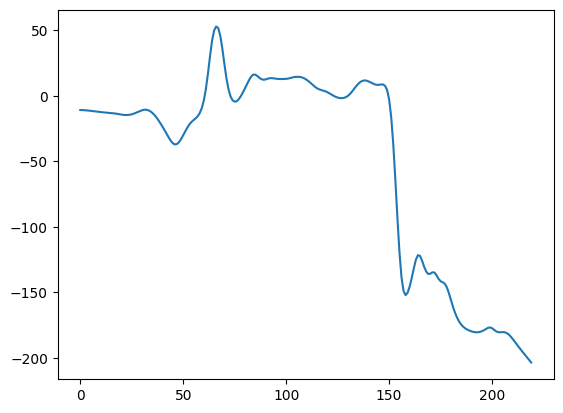

In [28]:
df['shoulders'].plot()

In [13]:
# # Preview the first 20 lines of a TRC file to inspect its structure
# with open("/Users/emilcarlsen/Downloads/Sports 2D Person Data.trc", "r") as f:
#     for i, line in enumerate(f):
#         print(line.strip())
#         if i >= 19:
#             break
def read_trc_file(file_path):
    # Skip first 3 rows and read all data
    df = pd.read_csv(file_path, sep='\t', skiprows=3)
    return df

# Example usage
trc_file_path = "/Users/emilcarlsen/Downloads/Sports 2D Person Data.trc"
df_trc = read_trc_file(trc_file_path)
df_trc.columns

Index(['Frame#', 'Time', 'Hip', 'Unnamed: 3', 'Unnamed: 4', 'RHip',
       'Unnamed: 6', 'Unnamed: 7', 'RKnee', 'Unnamed: 9', 'Unnamed: 10',
       'RAnkle', 'Unnamed: 12', 'Unnamed: 13', 'RBigToe', 'Unnamed: 15',
       'Unnamed: 16', 'RSmallToe', 'Unnamed: 18', 'Unnamed: 19', 'RHeel',
       'Unnamed: 21', 'Unnamed: 22', 'LHip', 'Unnamed: 24', 'Unnamed: 25',
       'LKnee', 'Unnamed: 27', 'Unnamed: 28', 'LAnkle', 'Unnamed: 30',
       'Unnamed: 31', 'LBigToe', 'Unnamed: 33', 'Unnamed: 34', 'LSmallToe',
       'Unnamed: 36', 'Unnamed: 37', 'LHeel', 'Unnamed: 39', 'Unnamed: 40',
       'Neck', 'Unnamed: 42', 'Unnamed: 43', 'Head', 'Unnamed: 45',
       'Unnamed: 46', 'Nose', 'Unnamed: 48', 'Unnamed: 49', 'RShoulder',
       'Unnamed: 51', 'Unnamed: 52', 'RElbow', 'Unnamed: 54', 'Unnamed: 55',
       'RWrist', 'Unnamed: 57', 'Unnamed: 58', 'LShoulder', 'Unnamed: 60',
       'Unnamed: 61', 'LElbow', 'Unnamed: 63', 'Unnamed: 64', 'LWrist',
       'Unnamed: 66', 'Unnamed: 67'],
      dtype